# ProdigyInfoTech-DataScience-Task05

# Task-05: Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

## 1. Importing Libraries

In [72]:
%pip install seaborn

In [73]:
%pip install plotly

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


## 2. Data preparation and cleaning

In [76]:
# Reading dataset
df = pd.read_csv("US_Accidents_March23.csv")

In [77]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [78]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541214 entries, 0 to 541213
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     541214 non-null  object 
 1   Source                 541214 non-null  object 
 2   Severity               541214 non-null  int64  
 3   Start_Time             541214 non-null  object 
 4   End_Time               541214 non-null  object 
 5   Start_Lat              541214 non-null  float64
 6   Start_Lng              541214 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           541214 non-null  float64
 10  Description            541214 non-null  object 
 11  Street                 540899 non-null  object 
 12  City                   541191 non-null  object 
 13  County                 541213 non-null  object 
 14  State                  541213 non-nu

In [80]:
# Transpose the result for better readibility
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,541214.0,2.354533,0.519234,1.000000,2.000000,2.000000,3.000000,4.000000
Start_Lat,541214.0,35.985129,5.033095,24.554800,32.820560,34.356070,40.159823,48.964069
Start_Lng,541214.0,-97.054712,18.150252,-124.273361,-118.038414,-95.436523,-81.473312,-68.692039
End_Lat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Lng,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance(mi),541214.0,0.079362,0.869795,0.000000,0.000000,0.010000,0.010000,90.370003
Temperature(F),533293.0,65.666116,16.823498,-77.800000,55.900000,68.000000,78.100000,167.000000
Wind_Chill(F),90600.0,44.848822,25.735381,-50.000000,26.500000,37.600000,71.000000,114.000000
Humidity(%),532492.0,64.845151,21.385067,1.000000,49.000000,66.000000,82.000000,100.000000
Pressure(in),534930.0,29.968857,0.355828,0.120000,29.890000,29.990000,30.100000,39.450000


In [81]:
# Checking the missing values
df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  541214
End_Lng                  541214
Distance(mi)                  0
Description                   0
Street                      315
City                         23
County                        1
State                         1
Zipcode                      62
Country                       1
Timezone                     85
Airport_Code                140
Weather_Timestamp          4531
Temperature(F)             7921
Wind_Chill(F)            450614
Humidity(%)                8722
Pressure(in)               6284
Visibility(mi)            11352
Wind_Direction             4846
Wind_Speed(mph)           91674
Precipitation(in)        460054
Weather_Condition         10993
Amenity                       1
Bump                          1
Crossing

In [82]:
# Calculating percentage of missing values for each column
missing_percentage = df.isnull().sum() * 100 / len(df)

# Creating a DataFrame summarizing the percentage of missing values for each column
missing_values_df = pd.DataFrame({'missing_percentage':missing_percentage})

In [83]:
# Sorting the DataFrame 'missing_values_df' in descending order based on the percentage off missing values
missing_values_df.sort_values('missing_percentage', ascending=False, inplace=True)

In [84]:
# Filtering rows in 'missing_values_df' where the percentage of missing values is greater than 0
missing_values_df[missing_values_df['missing_percentage'] > 0]

,missing_percentage
End_Lat,100.000000
End_Lng,100.000000
Precipitation(in),85.004083
Wind_Chill(F),83.259857
Wind_Speed(mph),16.938586
Visibility(mi),2.097507
Weather_Condition,2.031174
Humidity(%),1.611562
Temperature(F),1.463562
Pressure(in),1.161093


<AxesSubplot:>

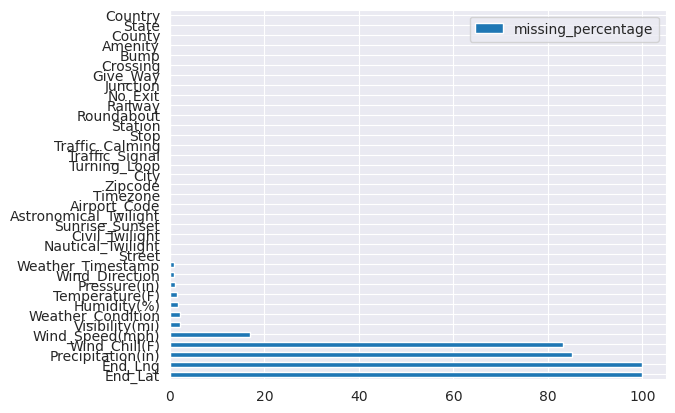

In [85]:
# Creating a barplot for columns with missing values in 'missing_values_df'
missing_values_df[missing_values_df['missing_percentage'] > 0].plot(kind='barh')

## 3. Exploratory Data Analysis and Visualization
Analysis based on the geographical location attributes Street - Shows the street name in
address field (Too many missing values) Side - Shows the relative side of the street (Right/Left)
in address field City - Shows the city in address field. County - Shows the county in address field.
State - Shows the state in address field.


## 1. State

In [86]:
# Counting the number of occurrences of each unique state in 'State' column
State = df.State.value_counts().reset_index()

# Remaining columns for clarity
State.columns = ['State', 'Accidents']

State.head()

,State,Accidents
0,CA,179937
1,TX,83542
2,FL,52229
3,PA,32831
4,MI,27016


In [87]:
#Calculating the percentage of accidents for each state and adding a new 'Percentage' column to the 'State' DataFrame
State['Percentage'] = round(State['Accidents'] * 100 / State['Accidents'].sum(), 2)
State.head()

,State,Accidents,Percentage
0,CA,179937,33.25
1,TX,83542,15.44
2,FL,52229,9.65
3,PA,32831,6.07
4,MI,27016,4.99


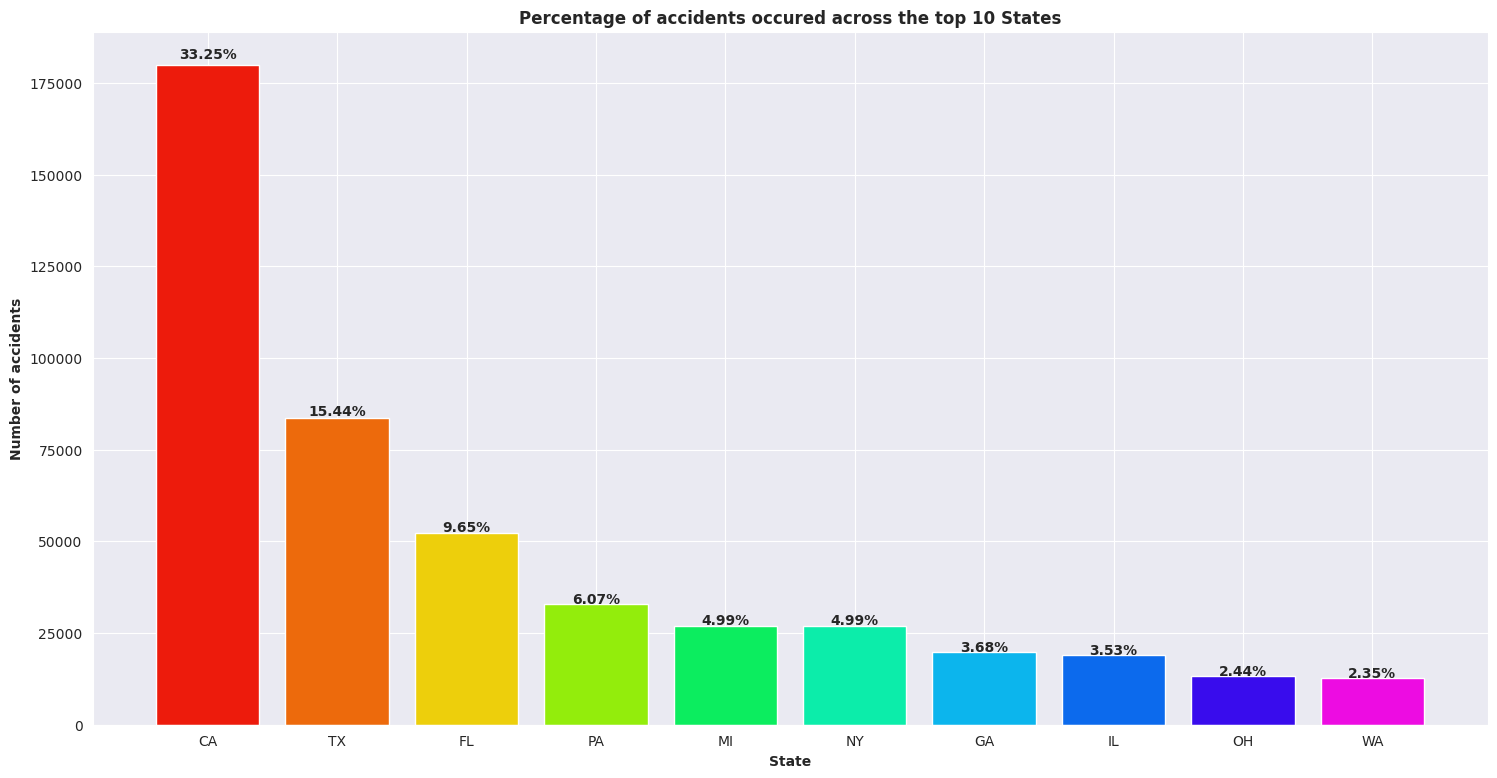

In [88]:
# Top 10 Accidents Prone State
plt.figure(figsize=(18,9))
graph = plt.bar(State.State.head(10),State.Accidents.head(10), color=('#ed1b0c','#ed6a0c','#edcf0c','#93ed0c','#0ced5f','#0cedaa','#0cb5ed','#0c6aed','#390ced','#ed0ce2' ))
plt.title('Percentage of accidents occured across the top 10 States', ha='center', weight='bold')
plt.xlabel("State", ha='center', weight='bold')
plt.ylabel("Number of accidents", ha='center', weight='bold')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(State.Percentage[i])+'%', ha='center', weight='bold')
    i += 1

plt.show()


## 2. City

In [89]:
# Replacing missing values in 'City' column with the string "Missing"
df.loc[df["City"].isnull(), "City"] = "Missing"

In [90]:
# Count the number of accidents for each city based on "City" and "State"
City = df[["City", "State"]].value_counts().reset_index()

In [91]:
# Rename columns
City.columns = ["Cities", "State","Accidents"]

In [92]:
# Calculate percentage of accidents for each city and add a new column 'Percentage'
City['Percentage'] = round(City['Accidents'].sum(), 2) * 100 / City['Accidents']

In [93]:
City.head()

,Cities,State,Accidents,Percentage
0,Houston,TX,28129,1924.039248
1,Austin,TX,19566,2766.089134
2,Los Angeles,CA,19278,2807.412595
3,Dallas,TX,18910,2862.046536
4,Atlanta,GA,9907,5462.935298


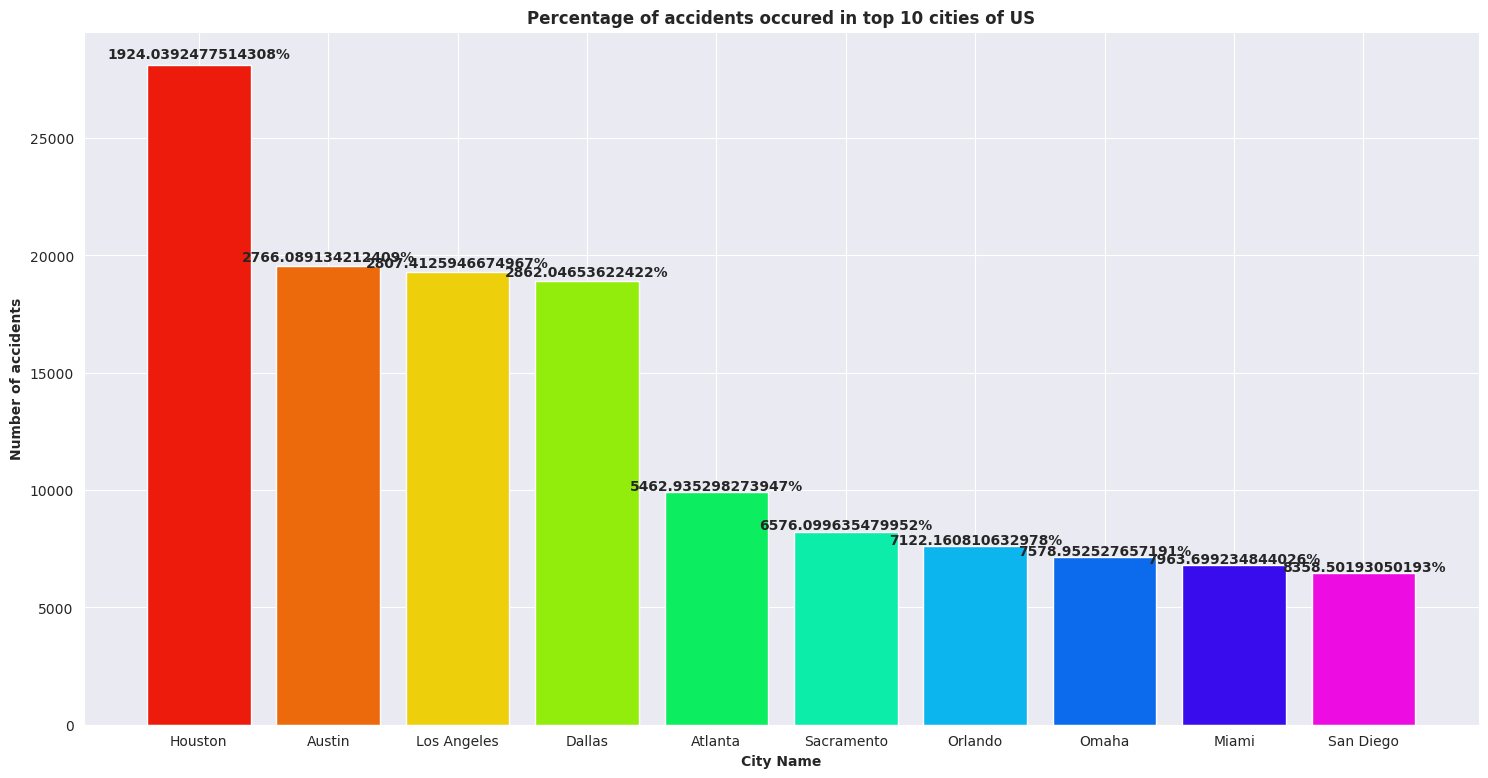

In [94]:
# Top 10 accidents prone cities
plt.figure(figsize=(18,9))
graph = plt.bar(City.Cities.head(10), City.Accidents.head(10),
                color = ('#ed1b0c','#ed6a0c','#edcf0c','#93ed0c','#0ced5f','#0cedaa','#0cb5ed','#0c6aed','#390ced','#ed0ce2'))
plt.title("Percentage of accidents occured in top 10 cities of US", ha='center', weight='bold')
plt.xlabel("City Name", ha='center', weight='bold')
plt.ylabel("Number of accidents", ha='center', weight='bold')

i = 0
for  p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(City.Percentage[i])+'%', ha = 'center', weight = 'bold')
    i+=1
plt.show()    

In [95]:
# Bins and Labels for categorizing the number accidents in 'city'
bins = [0,1,10, 100, 1000, 10000, 50000, 100000, float("inf")]
labels = ['Zero','Between 1-10','Between 10-100','Between 100-1000','Between 1000-10000','Between 10000-50000','Between 50000-100000','Greater than 100000']

In [96]:
City['Binned'] = pd.cut(City['Accidents'], bins=bins, labels=labels,right=False)
City.head()

,Cities,State,Accidents,Percentage,Binned
0,Houston,TX,28129,1924.039248,Between 10000-50000
1,Austin,TX,19566,2766.089134,Between 10000-50000
2,Los Angeles,CA,19278,2807.412595,Between 10000-50000
3,Dallas,TX,18910,2862.046536,Between 10000-50000
4,Atlanta,GA,9907,5462.935298,Between 1000-10000


In [98]:
# Grouping 'City' by ;Binned' column and counting the number of cities in each bin and reset index
Bin_data = City.groupby(['Binned']).count()['Cities'].reset_index()

# Calculate percentage of cities in each bins
Bin_data['Percentage(%)'] = round(Bin_data.Cities * 100 / Bin_data.Cities.sum(),2 )
Bin_data

,Binned,Cities,Percentage(%)
0,Zero,0,0.00
1,Between 1-10,4477,61.62
2,Between 10-100,1979,27.24
3,Between 100-1000,742,10.21
4,Between 1000-10000,63,0.87
5,Between 10000-50000,4,0.06
6,Between 50000-100000,0,0.00
7,Greater than 100000,0,0.00


Text(0, 0.5, 'BINS')

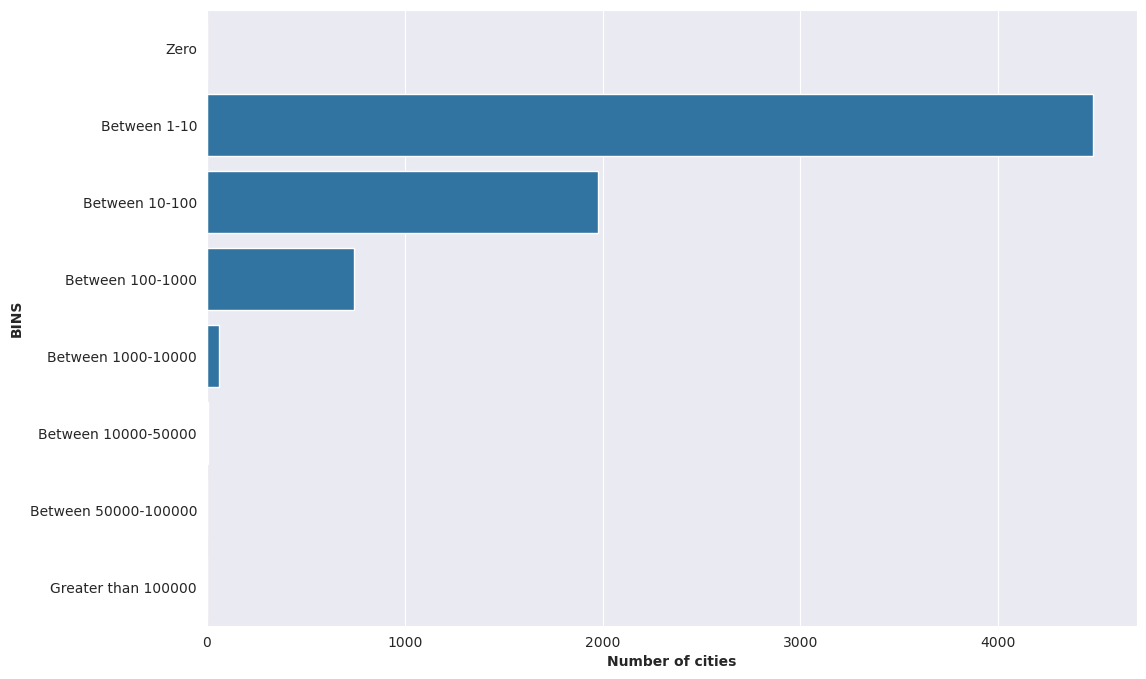

In [99]:
# Visualizing number of cities based on bin and labels
plt.figure(figsize=(12,8))
sns.barplot(x="Cities", y="Binned", data=Bin_data)
plt.xlabel("Number of cities", ha='center',weight='bold')
plt.ylabel("BINS", ha='center',weight='bold')

## 3. Severity

In [100]:
# Counting the number of accidents fro each severity level
Acc_Severity = df['Severity'].value_counts().reset_index()
Acc_Severity.columns = ['Severity', 'Accidents']
Acc_Severity['Percentage'] = round(Acc_Severity['Accidents'] * 100 / Acc_Severity['Accidents'].sum(), 2)
Acc_Severity.head()



,Severity,Accidents,Percentage
0,2,328621,60.72
1,3,201562,37.24
2,1,10582,1.96
3,4,449,0.08


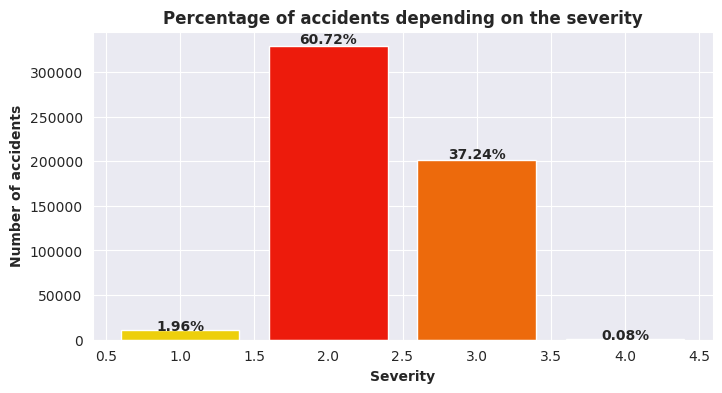

In [101]:
# Top 10 accidents depend on severity
plt.figure(figsize=(8,4))
graph = plt.bar(Acc_Severity.Severity, Acc_Severity.Accidents, color=('#ed1b0c','#ed6a0c','#edcf0c','#93ed0c'))
plt.title('Percentage of accidents depending on the severity',ha='center',weight='bold')
plt.xlabel("Severity",ha='center',weight='bold')
plt.ylabel("Number of accidents",ha='center',weight='bold')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(Acc_Severity.Percentage[i])+'%', ha = 'center', weight = 'bold')
    i+=1
plt.show()    

## 4. Time    

### Start_Time - Shows start time of the accident in local time zone.
### End_Time - Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

In [102]:
date_time = pd.DataFrame(None)

In [103]:
# Setting default value for missing data
default_value = 0

In [105]:
# Converting 'Start_Time', and 'End_Time' to datetime format
date_time['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
date_time['End_Time'] = pd.to_datetime(df['End_Time'], format="%Y-%m-%d %H:%M:%S", errors='coerce')


In [106]:
# Calculating the traffic hours impact and Fill missing values with default values
date_time['traffic_hours_impact'] = round((date_time['End_Time'] - date_time['Start_Time']) / pd.Timedelta(hours=1),0).fillna(default_value).astype(int)

In [107]:
# Extracting hours, year, and month from 'Start_Time'
date_time['hours_of_accident'] = date_time['Start_Time'].dt.hour
date_time['year_of_accident'] = date_time['Start_Time'].dt.year
date_time['month_of_accident'] = date_time['Start_Time'].dt.month

date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541214 entries, 0 to 541213
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Start_Time            541214 non-null  datetime64[ns]
 1   End_Time              541214 non-null  datetime64[ns]
 2   traffic_hours_impact  541214 non-null  int32         
 3   hours_of_accident     541214 non-null  int64         
 4   year_of_accident      541214 non-null  int64         
 5   month_of_accident     541214 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(3)
memory usage: 22.7 MB


In [108]:
date_time.head()

,Start_Time,End_Time,traffic_hours_impact,hours_of_accident,year_of_accident,month_of_accident
0,2016-02-08 05:46:00,2016-02-08 11:00:00,5,5,2016,2
1,2016-02-08 06:07:59,2016-02-08 06:37:59,0,6,2016,2
2,2016-02-08 06:49:27,2016-02-08 07:19:27,0,6,2016,2
3,2016-02-08 07:23:34,2016-02-08 07:53:34,0,7,2016,2
4,2016-02-08 07:39:07,2016-02-08 08:09:07,0,7,2016,2


## 5. Number of accident in each from 2016-2023

In [109]:
# Ca#lculating number of accident for each year
year_data = date_time['year_of_accident'].value_counts().reset_index()
year_data.columns = ['Year', 'Number_of_accidents']
year_data = year_data.sort_values('Year', ascending=True).reset_index(drop=True)

In [110]:
year_data

,Year,Number_of_accidents
0,2016,281261
1,2017,230956
2,2022,28997


Text(0, 0.5, 'Number_of_accidents')

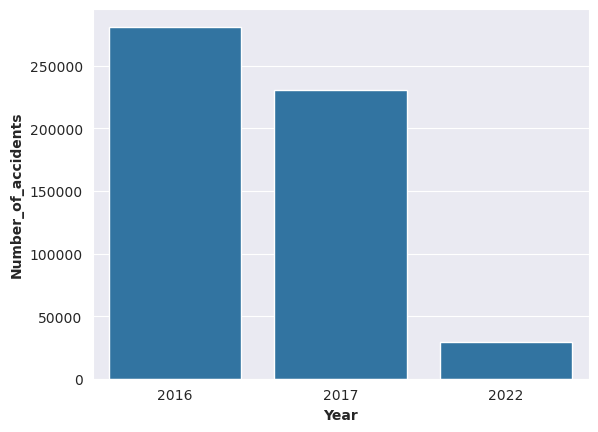

In [111]:
# Number of accident for each year
sns.barplot(x='Year', y='Number_of_accidents', data=year_data, ci=None)
plt.xlabel('Year', ha='center', weight='bold')
plt.ylabel('Number_of_accidents', ha='center', weight='bold')

In [112]:
# Counting the number of accidents for each month every year
year_data = date_time[['year_of_accident', 'month_of_accident']].value_counts().reset_index()

# Renaming column
year_data.columns = ['Year', 'Month', 'Number_of_accidents']

year_data = year_data.sort_values(['Year', 'Month'], ascending=True).reset_index(drop=True)
year_data

,Year,Month,Number_of_accidents
0,2016,2,425
1,2016,3,3871
2,2016,4,12059
3,2016,5,10235
4,2016,6,20432
5,2016,7,30761
6,2016,8,38541
7,2016,9,39565
8,2016,10,38185
9,2016,11,46532


Text(0, 0.5, 'Number of accidents')

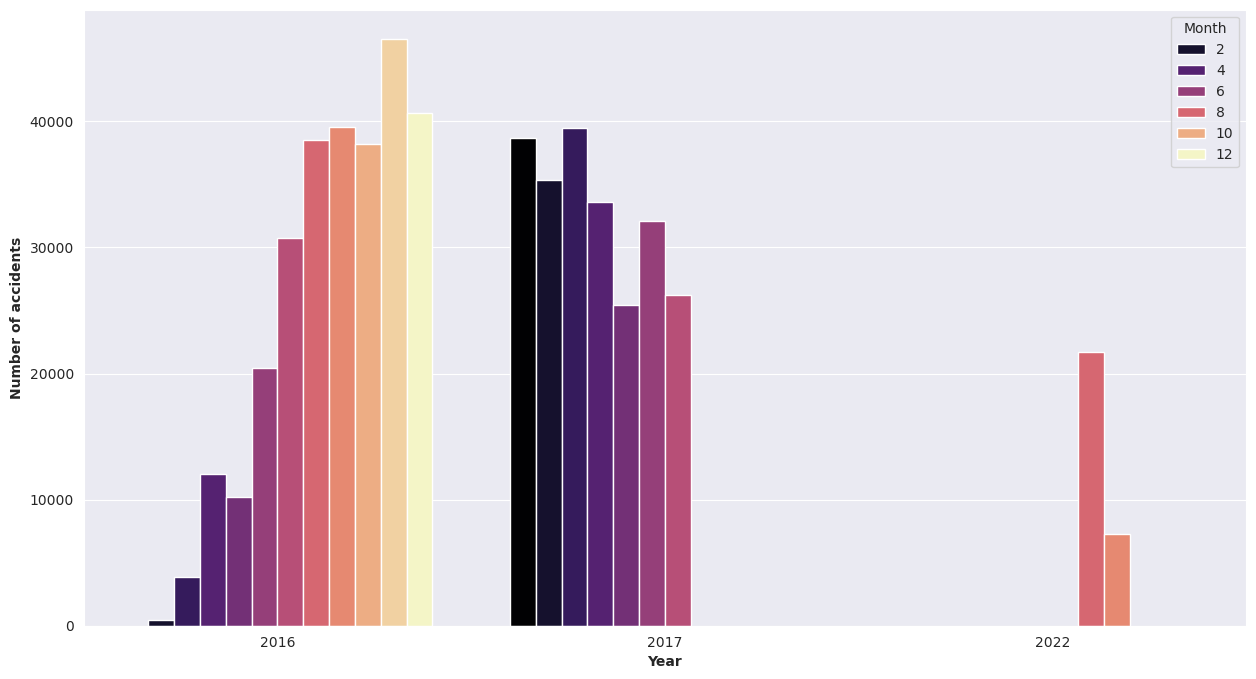

In [113]:
plt.figure(figsize=(15,8))
sns.barplot(x='Year', y='Number_of_accidents', data=year_data, hue='Month', palette='magma')
plt.xlabel("Year", ha='center',weight='bold')
plt.ylabel("Number of accidents", ha='center',weight='bold')

## 6. Hour of the day when the accident happened

In [114]:
# Counting the number of accidents for each hour
hour_data = date_time.hours_of_accident.value_counts().reset_index()

# Renaming column
hour_data.columns = ['hours_of_accident','Number_of_accidents']

# Sorting the data based on 'Hour_of_accident' in ascending order
hour_data = hour_data.sort_values('hours_of_accident',ascending=True).reset_index().drop('index',axis=1)

hour_data


,hours_of_accident,Number_of_accidents
0,0,5034
1,1,3862
2,2,4132
3,3,3428
4,4,7751
5,5,11441
6,6,21973
7,7,38507
8,8,45635
9,9,36365


Text(0, 0.5, 'Number of accidents')

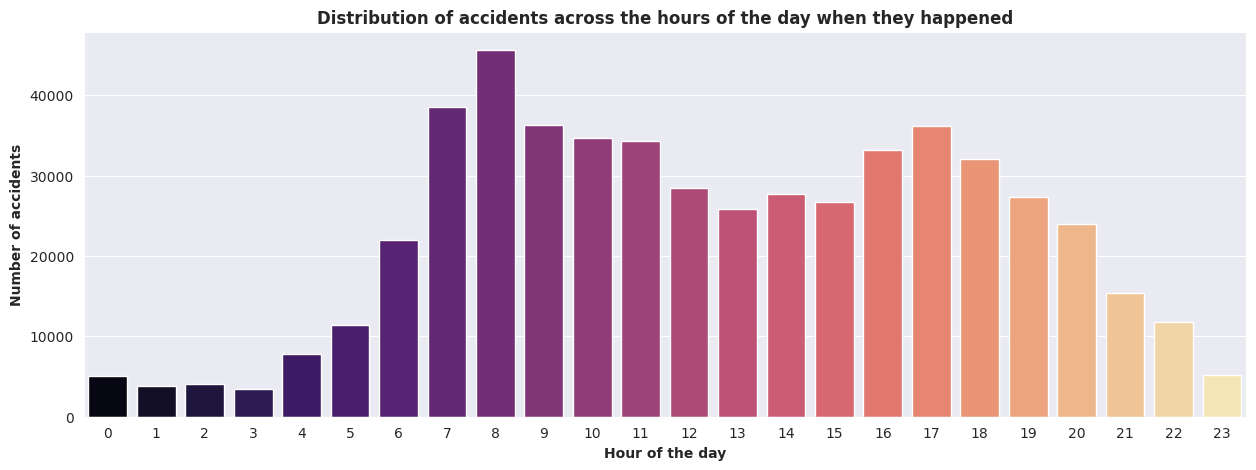

In [115]:
plt.figure(figsize=(15,5))
sns.barplot(x='hours_of_accident',y='Number_of_accidents',data=hour_data,palette='magma')
plt.title("Distribution of accidents across the hours of the day when they happened",ha='center',weight='bold')
plt.xlabel("Hour of the day", ha='center',weight='bold')
plt.ylabel("Number of accidents", ha='center',weight='bold')


In [116]:
# Analyzing the impact duration of traffic accidents by counting the occurrences for each duration
# Calculating cumulative percentages, and displaying the first 20 rows of the resulting dataframe
# 'Traffic_affect'

traffic_affect = date_time.traffic_hours_impact.value_counts().reset_index()
traffic_affect.columns = ['traffic_hours_impact','Number_of_accidents']
traffic_affect = traffic_affect.sort_values('traffic_hours_impact',ascending=True).reset_index().drop('index',axis=1)
traffic_affect['cum_percent'] = 100 * (traffic_affect['Number_of_accidents'].cumsum() / traffic_affect['Number_of_accidents'].sum())
traffic_affect.head(20)


,traffic_hours_impact,Number_of_accidents,cum_percent
0,0,269195,49.739105
1,1,265754,98.842417
2,2,5326,99.826501
3,3,373,99.895420
4,4,210,99.934222
5,5,116,99.955655
6,6,79,99.970252
7,7,69,99.983001
8,8,30,99.988544
9,9,9,99.990207


In [117]:
traffic_affect.head()

,traffic_hours_impact,Number_of_accidents,cum_percent
0,0,269195,49.739105
1,1,265754,98.842417
2,2,5326,99.826501
3,3,373,99.895420
4,4,210,99.934222


Text(0, 0.5, 'Number of accidents')

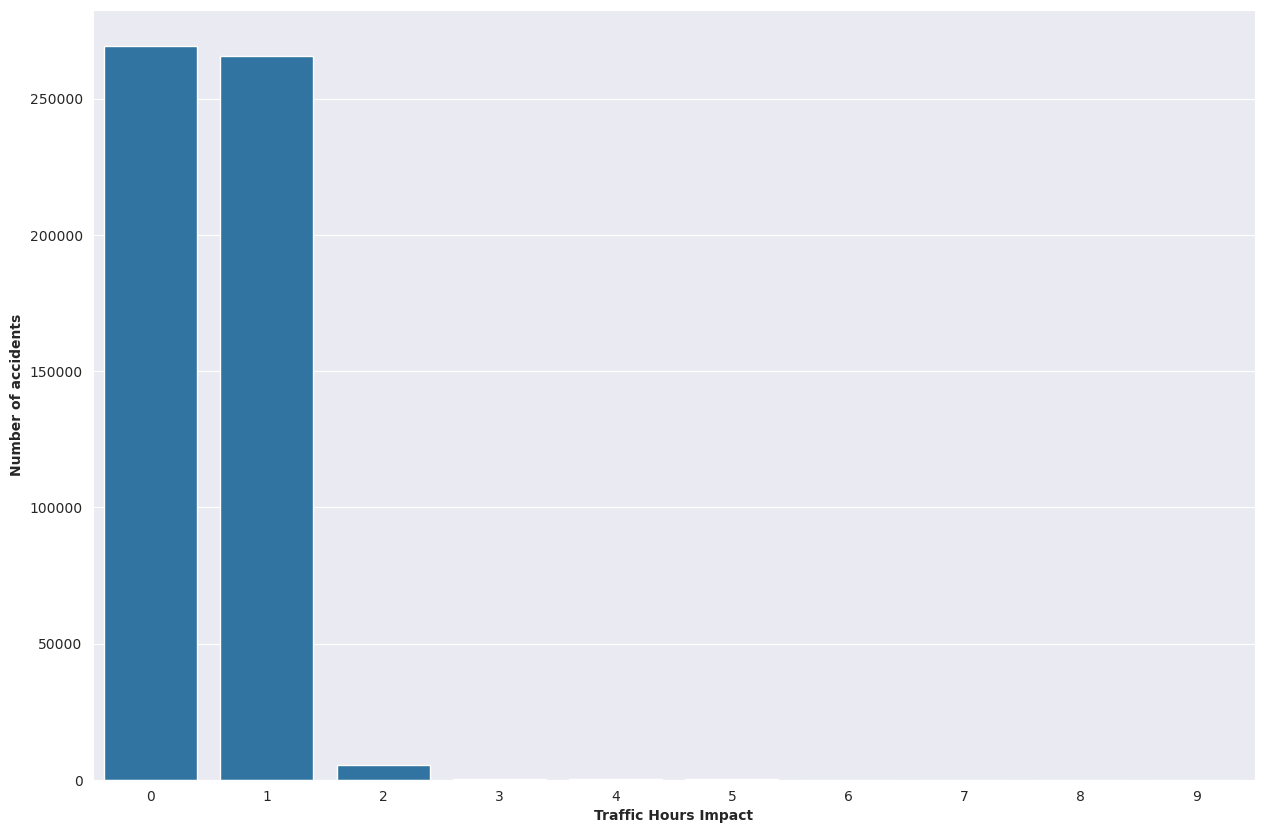

In [118]:
# Visualization of traffic_hours_impact based on number_of_accidents
plt.figure(figsize=(15,10))
sns.barplot(x='traffic_hours_impact', y='Number_of_accidents',data=traffic_affect.head(10))
plt.xlabel("Traffic Hours Impact", ha='center',weight='bold')
plt.ylabel("Number of accidents", ha='center',weight='bold')


## 7. Weather Conditions

In [119]:
# Counting the distribution of accidents based on weather conditions.
# Calculating percentages, and displaying the first 10 rows of weather_conditions.

weather = df.Weather_Condition.value_counts().reset_index()
weather.columns = ['Weather_Condition', 'Accidents']
weather['Percentage'] = round(weather['Accidents'] * 100 / weather['Accidents'].sum(),2)
weather.head(10)

,Weather_Condition,Accidents,Percentage
0,Clear,208905,39.40
1,Overcast,80265,15.14
2,Mostly Cloudy,73279,13.82
3,Partly Cloudy,52022,9.81
4,Scattered Clouds,47595,8.98
5,Light Rain,21998,4.15
6,Fair,16719,3.15
7,Haze,6077,1.15
8,Rain,4643,0.88
9,Light Snow,3962,0.75


In [120]:
weather.nunique

<bound method DataFrame.nunique of     Weather_Condition  Accidents  Percentage
0               Clear     208905       39.40
1            Overcast      80265       15.14
2       Mostly Cloudy      73279       13.82
3       Partly Cloudy      52022        9.81
4    Scattered Clouds      47595        8.98
..                ...        ...         ...
67  Low Drifting Snow          1        0.00
68       Snow Showers          1        0.00
69        Snow Grains          1        0.00
70       Blowing Sand          1        0.00
71    Drizzle and Fog          1        0.00

[72 rows x 3 columns]>

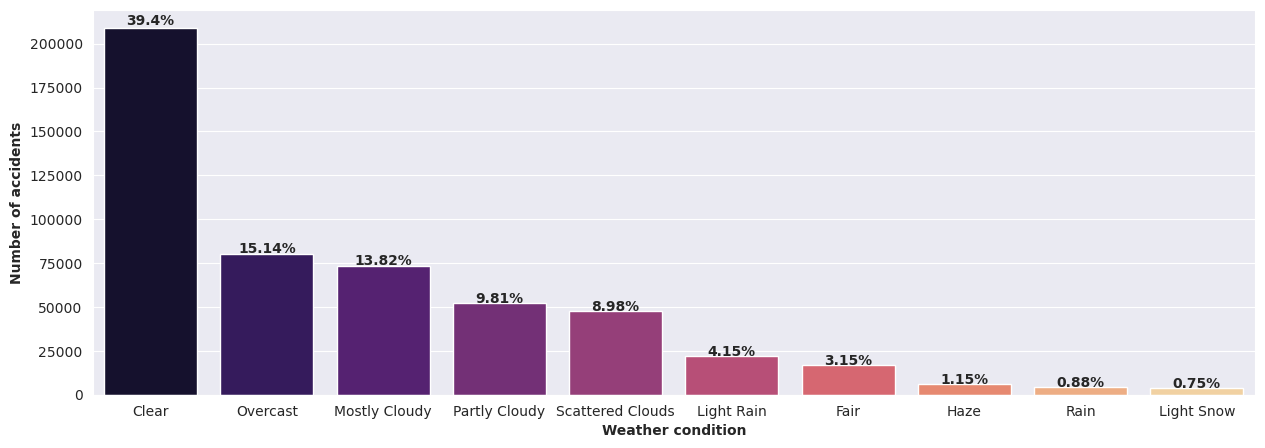

In [121]:
fig, ax = plt.subplots(figsize = (15,5))
sns.barplot(x='Weather_Condition',y='Accidents',data=weather.head(10),palette="magma")
plt.xlabel("Weather condition",ha='center',weight='bold')
plt.ylabel("Number of accidents",ha='center',weight='bold')

i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(weather.Percentage[i])+'%', ha='center', weight='bold')
    i += 1
plt.show()

## Soverity and Wind Chill

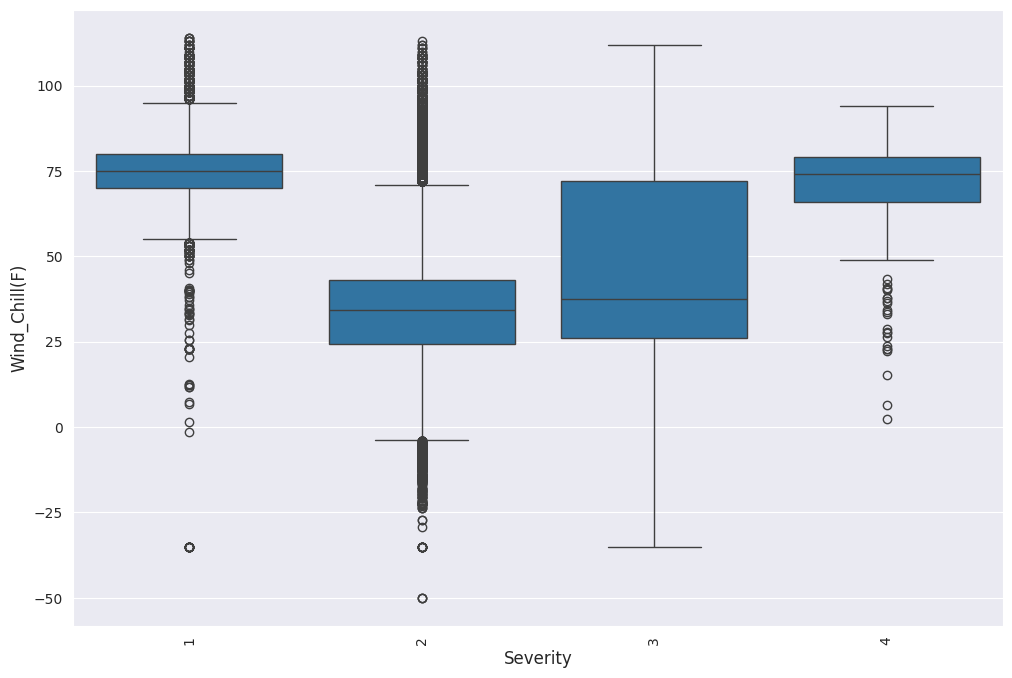

In [122]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Wind_Chill(F)", data=df)
plt.ylabel('Wind_Chill(F)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


## Soverity and Temperature

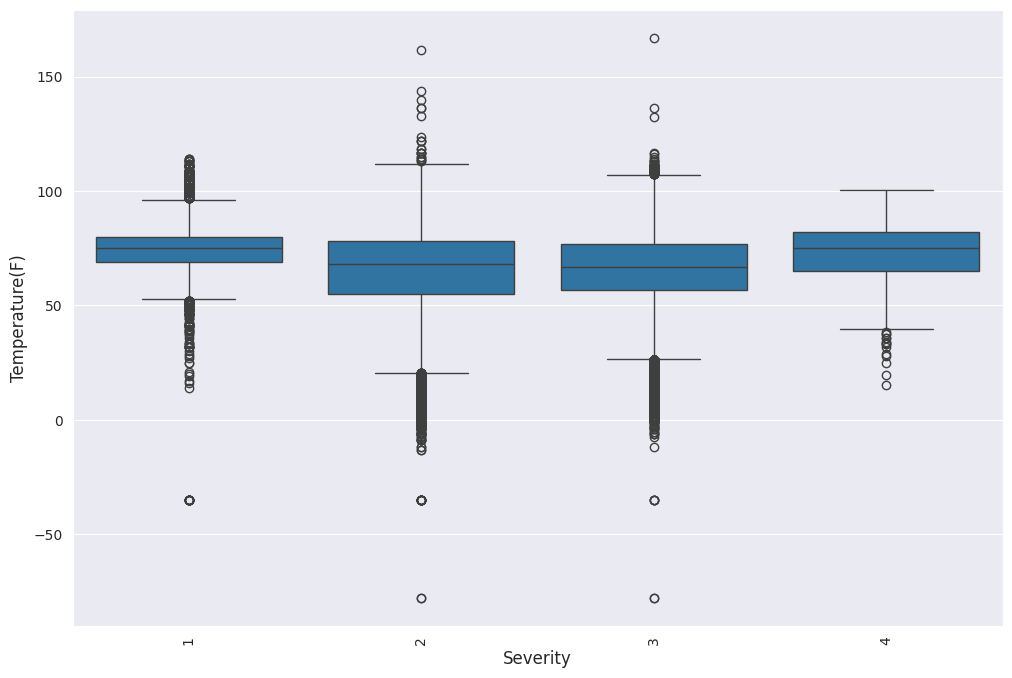

In [124]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Temperature(F)", data=df)
plt.ylabel('Temperature(F)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


## Soverity and Humidity

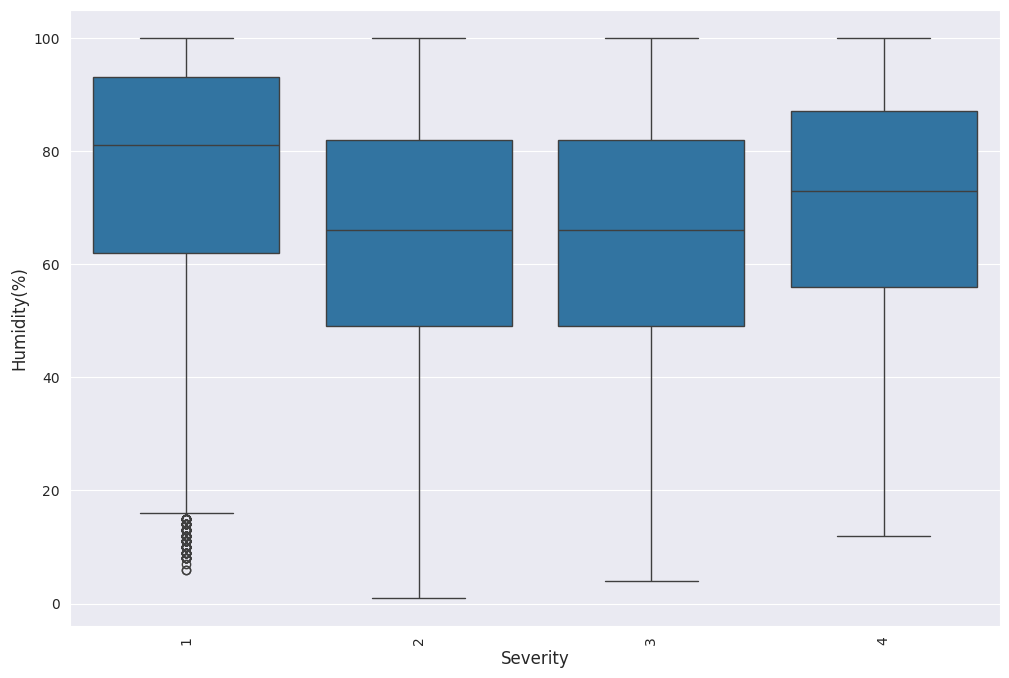

In [125]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Humidity(%)", data=df)
plt.ylabel('Humidity(%)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
